In [54]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model


In [55]:
#reading the data
train = pd.read_csv("train (1).csv")
test = pd.read_csv(r'C:\Users\Prajith\Downloads\test.csv')

In [56]:
train.head(2)

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,C,14.451155,1139.0,1.0,9.302908,1.0,M,p,86.108947
1,1,108,H,14.207448,1656.0,1.0,7.220130,0.0,M,p,42.606833


In [57]:
#Checking the information of the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   10000 non-null  int64  
 1   data2   10000 non-null  int64  
 2   data3   10000 non-null  object 
 3   data4   10000 non-null  float64
 4   data5   9999 non-null   float64
 5   data6   9997 non-null   float64
 6   data7   9998 non-null   float64
 7   data8   9999 non-null   float64
 8   data9   9999 non-null   object 
 9   data10  9999 non-null   object 
 10  output  9999 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 859.5+ KB


In [58]:
#statistcal info of the train data
train.describe()

,data1,data2,data4,data5,data6,data7,data8,output
count,10000.000000,10000.000000,10000.000000,9999.000000,9997.000000,9998.000000,9999.000000,9999.000000
mean,4.500200,199.937000,19.980069,1999.994099,0.499850,5.032647,0.989699,67.641293
std,3.468602,57.637745,5.790647,575.293177,0.500025,2.882390,0.812112,13.373996
min,0.000000,100.000000,0.000000,4.000000,0.000000,0.001195,0.000000,30.857090
25%,2.000000,149.000000,14.928790,1505.000000,0.000000,2.541841,0.000000,57.393568
50%,4.000000,201.000000,20.000361,1999.000000,0.000000,5.008526,1.000000,67.877814
75%,7.000000,250.000000,24.979557,2490.000000,1.000000,7.520097,2.000000,77.831703
max,200.000000,299.000000,70.002000,2999.000000,1.000000,9.999848,2.000000,103.809450


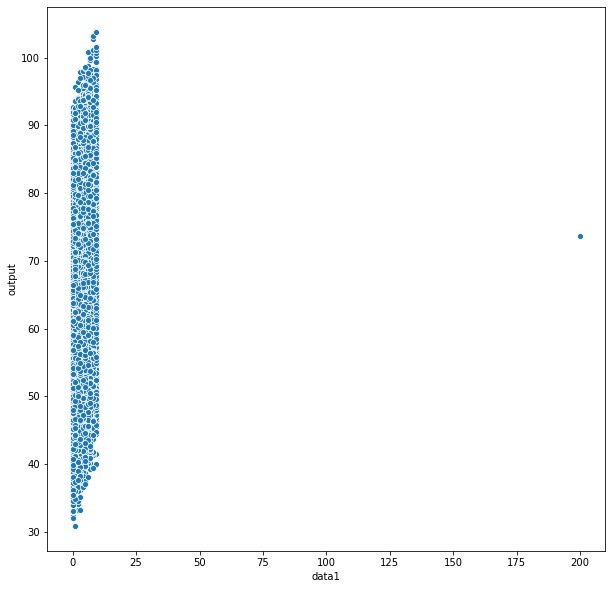

In [59]:
#Vizualization of first column

plt.figure(figsize = (10,10))
sns.scatterplot(x = train['data1'], y = train['output'])

In [60]:
#Handling the Outlier 
train["data1"].median()
train["data1"].replace(200, train["data1"].median(), inplace = True)
train["data1"].max()

9

In [61]:
train.describe()

,data1,data2,data4,data5,data6,data7,data8,output
count,10000.000000,10000.000000,10000.000000,9999.000000,9997.000000,9998.000000,9999.000000,9999.000000
mean,4.480600,199.937000,19.980069,1999.994099,0.499850,5.032647,0.989699,67.641293
std,2.865038,57.637745,5.790647,575.293177,0.500025,2.882390,0.812112,13.373996
min,0.000000,100.000000,0.000000,4.000000,0.000000,0.001195,0.000000,30.857090
25%,2.000000,149.000000,14.928790,1505.000000,0.000000,2.541841,0.000000,57.393568
50%,4.000000,201.000000,20.000361,1999.000000,0.000000,5.008526,1.000000,67.877814
75%,7.000000,250.000000,24.979557,2490.000000,1.000000,7.520097,2.000000,77.831703
max,9.000000,299.000000,70.002000,2999.000000,1.000000,9.999848,2.000000,103.809450


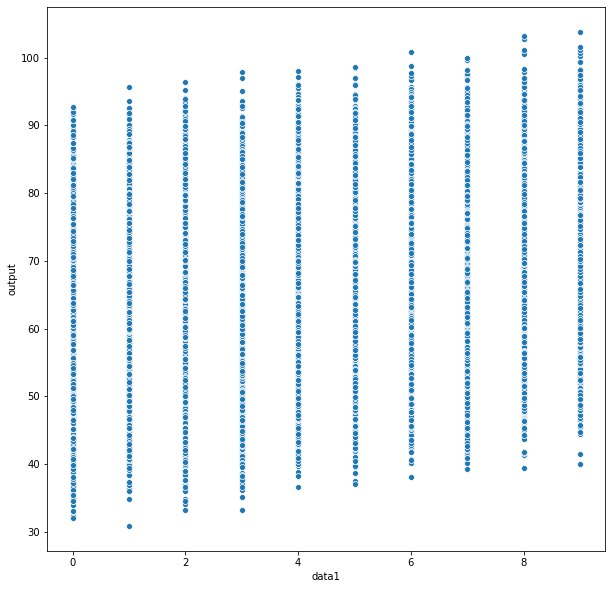

In [62]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = train['data1'], y = train['output'])

In [63]:
train.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     1
data6     3
data7     2
data8     1
data9     1
data10    1
output    1
dtype: int64

In [64]:
#filling the null values using mean and median
train["data5"].mean()
train["data5"].fillna(train["data5"].mean(), inplace = True)

train["data6"].mean()
train["data6"].fillna(train["data6"].mean(), inplace = True)

train["data7"].mean()
train["data7"].fillna(train["data7"].mean(), inplace = True)

train["data8"].mean()
train["data8"].fillna(train["data8"].mean(), inplace = True)

train["output"].mean()
train["output"].fillna(train["output"].mean(),  inplace = True)

In [65]:
train.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     0
data6     0
data7     0
data8     0
data9     1
data10    1
output    0
dtype: int64

In [66]:
#handling the categorical missing data
train["data9"].any()
train["data9"].fillna(train["data9"].any(),  inplace = True)

train["data10"].any()
train["data10"].fillna(train["data10"].any(), inplace =True)

In [67]:
train.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     0
data6     0
data7     0
data8     0
data9     0
data10    0
output    0
dtype: int64

In [68]:
#using label encoder to convert categorical data to numerical data

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [69]:
df1 =le.fit_transform(train["data9"])

df2 = le.fit_transform(train["data3"])

df3 = le.fit_transform(train["data10"])

#now all the categorical columns are converted to numerical data 

In [70]:
df1

array([1, 1, 1, ..., 0, 0, 0])

In [71]:
#droping the categorical column from the dataframe
train2 =train.drop(["data3","data9","data10"], axis = 1)
train2.head()

,data1,data2,data4,data5,data6,data7,data8,output
0,8,279,14.451155,1139.0,1.0,9.302908,1.0,86.108947
1,1,108,14.207448,1656.0,1.0,7.220130,0.0,42.606833
2,8,258,19.220830,2817.0,1.0,8.727214,1.0,85.625961
3,4,147,15.752732,1948.0,1.0,6.078818,1.0,53.656277
4,5,230,10.195407,1336.0,1.0,4.749185,0.0,64.925051


In [72]:
#Adding the converted columns into the dataframe
train2["data3"]= df2
train2["data9"]= df1
train2["data10"]= df3


In [73]:
train2.head()

,data1,data2,data4,data5,data6,data7,data8,output,data3,data9,data10
0,8,279,14.451155,1139.0,1.0,9.302908,1.0,86.108947,2,1,0
1,1,108,14.207448,1656.0,1.0,7.220130,0.0,42.606833,7,1,0
2,8,258,19.220830,2817.0,1.0,8.727214,1.0,85.625961,0,1,0
3,4,147,15.752732,1948.0,1.0,6.078818,1.0,53.656277,0,1,0
4,5,230,10.195407,1336.0,1.0,4.749185,0.0,64.925051,7,1,0


In [74]:
#Rearranging the columns

train = train2[["data1","data2","data3","data4","data5","data6","data7","data8","data9","data10","output"]] 
train.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,2,14.451155,1139.0,1.0,9.302908,1.0,1,0,86.108947
1,1,108,7,14.207448,1656.0,1.0,7.220130,0.0,1,0,42.606833
2,8,258,0,19.220830,2817.0,1.0,8.727214,1.0,1,0,85.625961
3,4,147,0,15.752732,1948.0,1.0,6.078818,1.0,1,0,53.656277
4,5,230,7,10.195407,1336.0,1.0,4.749185,0.0,1,0,64.925051


In [75]:
#droping the column (data10) as the column is not usefull
del train["data10"]

In [76]:
#taking all the independent variables from the data frame to variable x
x = train.iloc[:,:-1]
x.head(2)

,data1,data2,data3,data4,data5,data6,data7,data8,data9
0,8,279,2,14.451155,1139.0,1.0,9.302908,1.0,1
1,1,108,7,14.207448,1656.0,1.0,7.220130,0.0,1


In [77]:
#taking the dependent variable from the data frame to variable y
y = train.iloc[::,-1]
y.head()

0    86.108947
1    42.606833
2    85.625961
3    53.656277
4    64.925051
Name: output, dtype: float64

In [78]:
#Preprocessing the data
from sklearn import preprocessing

In [79]:
x= preprocessing.StandardScaler().fit_transform(x)

In [80]:
#checking the shape of the x variable
x[0:4]
x.shape

(10000, 9)

In [82]:
#train test split and checking the shape

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size =0.25, random_state =20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7500, 9) (2500, 9) (7500,) (2500,)


In [83]:
#fiting the linear regression

from sklearn import linear_model

regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train) 

LinearRegression()

In [95]:
y_pred = regressor.predict(x_test)
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred.head()

,Actual,Predicted
9957,69.832137,69.873130
1687,81.655853,81.640313
2116,61.719491,61.743370
231,40.138806,40.223247
2780,66.402588,66.374483


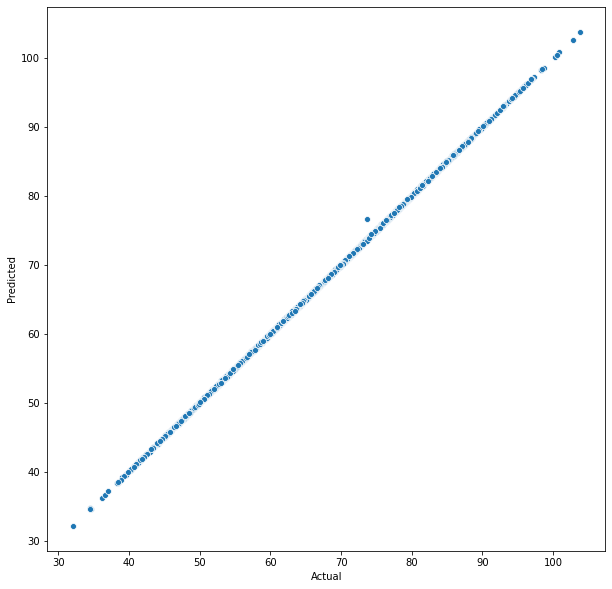

In [96]:
#plotting Actual and predicted
plt.figure(figsize = (10,10))
sns.scatterplot(x = pred["Actual"], y =  pred["Predicted"])